In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
A = np.array([[0.3, 0.4, 0.3], [0, 0.5, 0.5], [0.7, 0.1, 0.2]]) 
#np.array([[0.1348,0.1231,0.1952,0.3586,0.8944],
#              [0.2697,0.2462,0.3904,0.7171,-0.4472],
#              [0.4045,0.3693,0.5855,-0.5976,0],
#              [0.5394,0.4924,-0.6831,0,0],
#              [0.6742,-0.7385,0,0,0]]) # #Soules Matrix
#np.array([[0.0, 0.5],[0.7, 0.0]]) 
#np.random.random((10, 10))
#linalg.toeplitz([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 0, 0, 0, 0, 0, 0, 0])
#linalg.hilbert(10)
epsilon = 0.001
print(np.dot(A,A.T) - np.dot(A.T,A)<=epsilon)
eigvalues, eigvectors = np.linalg.eig(A)
x_eig = [eigvalues[k].real for k in range(len(eigvalues))]
y_eig = [eigvalues[k].imag for k in range(len(eigvalues))]


[[False False False]
 [False False False]
 [False False False]]


In [3]:
x_W = []
y_W = []

theta = np.linspace(0, 2*np.pi, 1000)

def algorithm(A, theta):
    for t in theta:
        Ah = (1/2)*(A*np.exp(complex(0,-t))+np.conjugate(A).T*np.exp(complex(0,t)))
        l, v = np.linalg.eig(Ah)
        k = np.argmax(np.abs(l))
        p = np.dot(np.conjugate(v[k]),np.dot(A,v[k]))
        x_W.append(p.real)
        y_W.append(p.imag)

    return x_W, y_W

x_W, y_W = algorithm(A,theta)



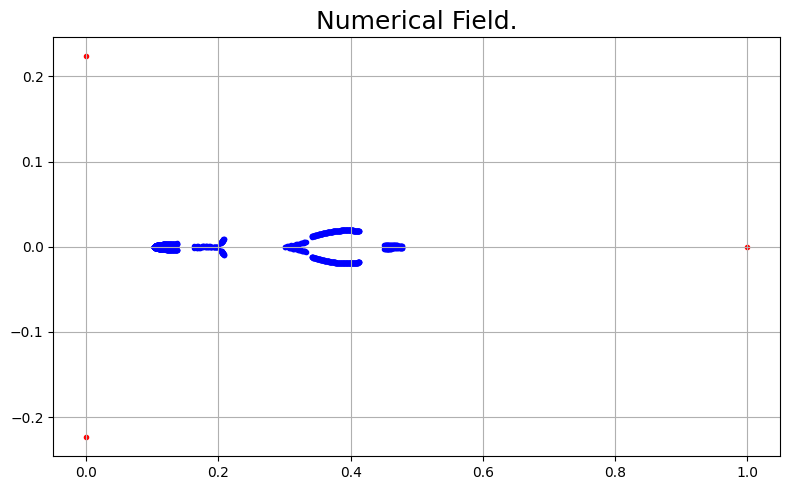

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(x_eig,y_eig,c='r',marker=".")
plt.scatter(x_W,y_W,c='b',marker=".")
plt.title('Numerical Field.',size=18)

plt.grid(True)
plt.tight_layout()

plt.show()

In [5]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [6]:
points = np.vstack((x_W,y_W)).T
hull = ConvexHull(points)

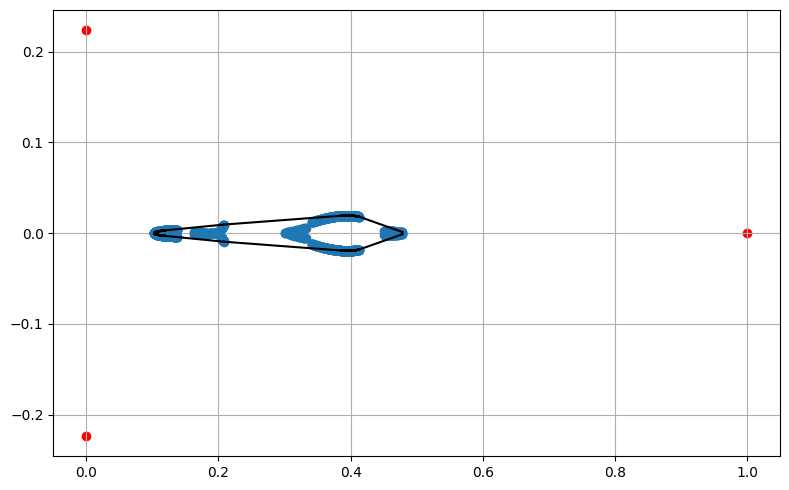

In [7]:
plt.figure(figsize=(8,5))
plt.plot(points[:,0], points[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.scatter(x_eig,y_eig,c='r',marker="o")

plt.grid(True)
plt.tight_layout()

plt.show()


In [9]:
N = 10

In [13]:
Q = np.identity(N)
x = np.ones(N)/np.sqrt(N)
Q[:,0] = x/np.linalg.norm(x)
print(Q)
for k in range(N):
    if x[k] != 0:
        sq = np.abs(x[k]-x[k+1])
        c = x[k]/sq
        s = x[k+1]/sq
        x[k]=sq
        x[k+1]=0

0.9999999999999999
[[0.31622777 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.31622777 0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.31622777 0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.31622777 0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.31622777 0.   

/tmp/ipykernel_26903/1961336211.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  c = x[k]/sq
/tmp/ipykernel_26903/1961336211.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  s = x[k+1]/sq
